# Data Overview

![](Data_Model.JPG)

# Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

# Dataframes

In [2]:
Subscription=pd.read_csv(r'user_data_set\track_subscription_data.csv',parse_dates=['subscription_date'])
Purchase=pd.read_csv(r'user_data_set\user_purchase_data.csv',parse_dates=['date_joined','date_of_first_purhcase'])
Quiz=pd.read_csv(r'user_data_set\user_quiz_attempt_data.csv',parse_dates=['started_at'])
Studycard=pd.read_csv(r'user_data_set\user_studycard_data.csv',parse_dates=['start_time'])
Video_Activity=pd.read_csv(r'user_data_set\user_video_activity_data.csv',parse_dates=['watched_at'])

# Purchase

In [36]:
Purchase.head()

,user_uid,date_joined,date_of_first_purhcase,Week_Threshold
0,6,2021-06-04,2021-06-04,2021-06-11
1,608,2021-06-04,NaT,2021-06-11
2,635,2021-06-04,NaT,2021-06-11
3,745,2021-06-04,NaT,2021-06-11
4,1506,2021-06-04,NaT,2021-06-11


In [7]:
#Paid and Unpaid Distribution
paid=Purchase[Purchase['date_of_first_purhcase'].notnull()]
print(f"""Total Number of Paid Users are: {paid.shape[0]}""")
Unpaid=Purchase[~Purchase['date_of_first_purhcase'].notnull()]
print(f"""Total Number of Unpaid Users are: {Unpaid.shape[0]}""")

#Adding a new column to calculate 7 days threshold
Purchase['Week_Threshold']=Purchase['date_joined']+dt.timedelta(7)


Total Number of Paid Users are: 576
Total Number of Unpaid Users are: 424


# Subscription

In [33]:
Subscription.head()

,user_id,track_slug,subscription_date
0,6,kerala-psc,2021-06-04
1,6,KTET,2021-06-04
2,608,spoken-english,2021-06-04
3,608,APPSC,2021-06-04
4,608,Eng_With_Awal,2021-06-04


In [44]:
Subscription.columns
#['user_id', 'track_slug', 'subscription_date']
print(f"""There are {Subscription['user_id'].nunique()} Distinct users have made an Subscription""")
print(f"""There are {Subscription['track_slug'].nunique()} Tracks available for Subscription """)

There are 962 Distinct users have made an Subscription
There are 66 Tracks available for Subscription 


In [45]:
#Number of Subscription per Track
sbs=Subscription.groupby(['track_slug'],
                     as_index=False).agg(No_of_Subscription=('user_id',
        pd.Series.nunique)).sort_values('No_of_Subscription',
        ascending=False)
sbs

,track_slug,No_of_Subscription
47,Spoken_eng_hindi,284
64,spoken-english,213
62,kerala-psc,163
4,BANK-INS,64
65,ssc,57
...,...,...
35,NEET,1
57,YourStory_Academy,1
27,I_S_T,1
28,JEE,1


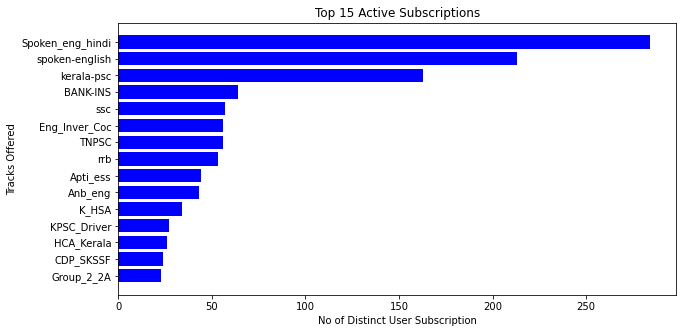

In [6]:
#Active Subscriptions
sbs=sbs.head(15).sort_values('No_of_Subscription',ascending=True)
fig = plt.figure(figsize = (10, 5))
plt.barh(sbs['track_slug'],sbs['No_of_Subscription'], color ='blue')
plt.xlabel("No of Distinct User Subscription")
plt.ylabel("Tracks Offered")
plt.title("Top 15 Active Subscriptions")
plt.show()



# QUIZ

In [9]:
Q_Unpaid.head()

,user_id,attempt_id,started_at,status,no_of_questions,question_attempted
0,1506,50839743,None,CREATE,10,0
1,1506,50839752,None,PAUSE,10,10
38,9331,50935021,2021-06-05 17:22:57.462810+00:00,COMPLETE,10,10
39,9331,50935430,None,CREATE,10,0
112,19104,51045498,2021-06-07 03:50:30.703350+00:00,COMPLETE,6,6


In [8]:
Q_Unpaid=Quiz[Quiz['user_id'].isin(Unpaid['user_uid'])]
print(f"""There are {Q_Unpaid.shape[0]} Quiz attempted by Unpaid Users""")
Q_paid=Quiz[Quiz['user_id'].isin(paid['user_uid'])]
print(f"""There are {Q_paid.shape[0]} Quiz attempted by paid Users""")

There are 1422 Quiz attempted by Unpaid Users
There are 19997 Quiz attempted by paid Users


In [10]:
Q_Unpaid=Q_Unpaid[Q_Unpaid['status']=='COMPLETE']

In [11]:
#Preparing Merged Dataframe for Quiz
Q_merge=pd.merge(Purchase,Quiz,left_on='user_uid', right_on='user_id',how='left')
print(Q_merge.shape[0])
#Filtering of the valid records to Get into 7 days Threshold
Q_merge=Q_merge[Q_merge['started_at']!='None']#Filtering out None values in Started_at Column
print(Q_merge.shape[0])
Q_merge=Q_merge[Q_merge['started_at'].notna()]#Filtering out nan values
print(Q_merge.shape[0])

#Extracting Date from Datetime column
Q_merge['Start_Date']=pd.to_datetime(Q_merge['started_at'].str.split(' ', expand=True)[0])

#Filtering First Week of Quiz Data
Q_merge=Q_merge[Q_merge['Start_Date']<Q_merge['Week_Threshold']]
Q_merge=Q_merge[['user_uid', 'date_joined', 'date_of_first_purhcase','status', 'no_of_questions',
       'question_attempted', 'Start_Date']]
print(Q_merge.shape[0])

Q_merge.head()

21789
13918
13548
4173


,user_uid,date_joined,date_of_first_purhcase,status,no_of_questions,question_attempted,Start_Date
1,6,2021-06-04,2021-06-04,COMPLETE,30.0,30.0,2021-06-07
2,6,2021-06-04,2021-06-04,COMPLETE,30.0,9.0,2021-06-07
3,6,2021-06-04,2021-06-04,COMPLETE,30.0,0.0,2021-06-07
4,6,2021-06-04,2021-06-04,COMPLETE,15.0,10.0,2021-06-08
5,6,2021-06-04,2021-06-04,COMPLETE,30.0,30.0,2021-06-08


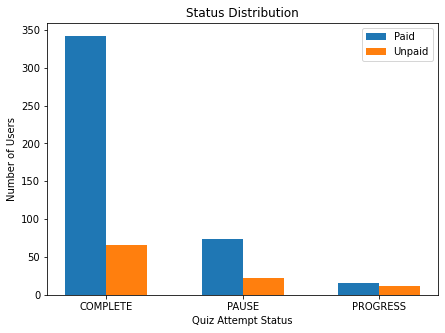

In [12]:
#Paid Users
paid=pd.DataFrame(Q_merge[Q_merge['date_of_first_purhcase'].notnull()].groupby('status').user_uid.nunique())
#Unpaid Users
unpaid=pd.DataFrame(Q_merge[Q_merge['date_of_first_purhcase'].isnull()].groupby('status').user_uid.nunique())

# Plotting
N=3
y1 = (unpaid['user_uid'].tolist())
y2 = (paid['user_uid'].tolist())
ind = np.arange(N)

plt.figure(figsize=(7,5))
width = 0.3  


plt.bar(ind, y2, width, label='Paid')
plt.bar(ind+width, y1 ,width, label='Unpaid')


plt.xlabel('Quiz Attempt Status')
plt.ylabel('Number of Users')
plt.title('Status Distribution')

plt.xticks(ind + width / 2, ('COMPLETE', 'PAUSE', 'PROGRESS'))
plt.legend(loc='best')
plt.show()

# StudyCard

In [14]:
Studycard.groupby('user_id').activity_id.nunique()
sd=pd.DataFrame(Studycard.groupby('user_id').activity_id.nunique())
sd=sd.sort_values('activity_id',ascending=False)

#Paid Users who is active in accessing study cards
SC_merge=pd.merge(Purchase,Studycard,left_on='user_uid', right_on='user_id',how='right')

#Paid 
SC_paid=SC_merge[~SC_merge['date_of_first_purhcase'].isnull()]
#Unpaid
SC_unpaid=SC_merge[SC_merge['date_of_first_purhcase'].isnull()]

print(f"""From 1000 users {SC_merge.shape[0]} have actively used Studycards in which there are {SC_paid.shape[0]} paid users and {SC_unpaid.shape[0]} Unpaid users""")



From 1000 users 3480 have actively used Studycards in which there are 3325 paid users and 155 Unpaid users


In [15]:
#1 Week Activity Data
SC_merge_week=SC_merge[SC_merge['start_time'].dt.date<SC_merge['Week_Threshold']]
SC_paid=SC_merge_week[~SC_merge_week['date_of_first_purhcase'].isnull()]
#Unpaid
SC_unpaid=SC_merge_week[SC_merge_week['date_of_first_purhcase'].isnull()]

print(f"""There are  {SC_merge_week.shape[0]} Studycard Activity recorded in the first week from their date joined in which there are {SC_paid.shape[0]} paid users and {SC_unpaid.shape[0]} Unpaid users""")


There are  1933 Studycard Activity recorded in the first week from their date joined in which there are 1780 paid users and 153 Unpaid users


In [16]:
#Creating a Dataframe to Analyse Complete Activity with 1 week Activity
SC_merge_week_pivot=SC_merge_week.groupby('user_uid').activity_id.nunique().sort_values(ascending=False)
SC_merge_pivot=SC_merge.groupby('user_uid').activity_id.nunique().sort_values(ascending=False)
df=pd.merge(SC_merge_pivot,SC_merge_week_pivot,left_index=True, right_index=True)
df.reset_index(level=0, inplace=True)

In [17]:
paid=df[df['user_uid'].isin( Purchase[Purchase['date_of_first_purhcase'].notnull()]['user_uid'])].head(15)
unpaid=df[df['user_uid'].isin( Purchase[Purchase['date_of_first_purhcase'].isnull()]['user_uid'])].head(15)

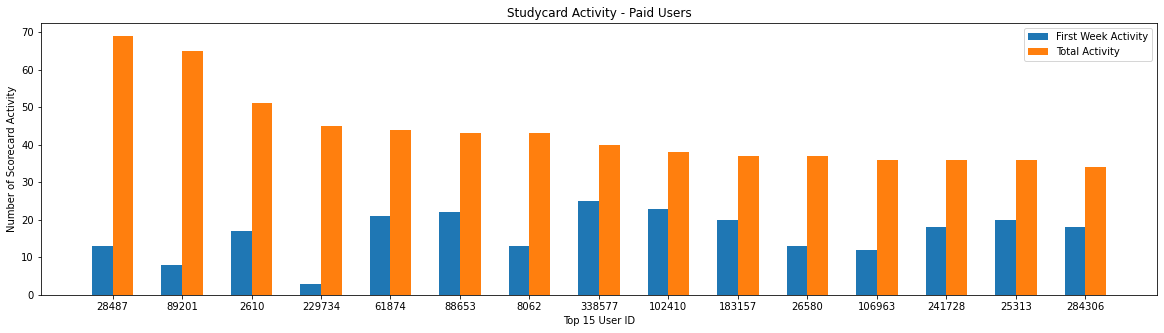

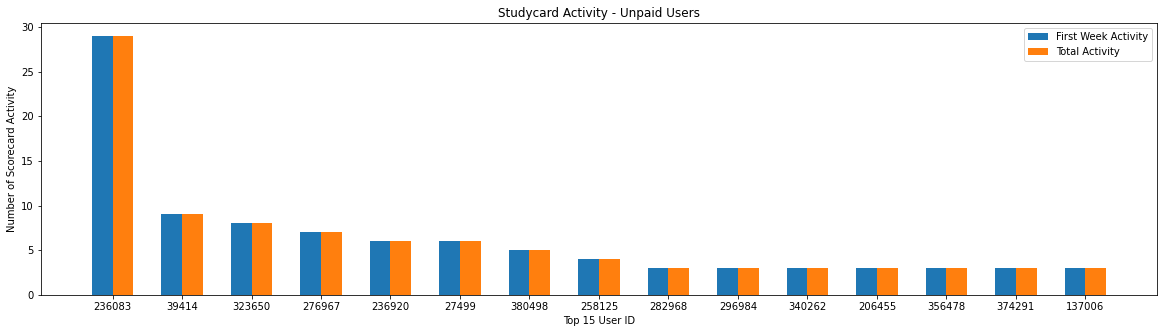

In [32]:
# Plotting
N=15
y1 = (paid['activity_id_x'].tolist())
y2 = (paid['activity_id_y'].tolist())
ind = np.arange(N)

plt.figure(figsize=(20,5))
width = 0.3   


plt.bar(ind, y2, width, label='First Week Activity')
plt.bar(ind+width, y1 ,width, label='Total Activity')


plt.xlabel('Top 15 User ID')
plt.ylabel('Number of Scorecard Activity')
plt.title('Studycard Activity - Paid Users')

plt.xticks(ind + width / 2, (paid['user_uid'].tolist()))
plt.legend(loc='best')
plt.show()



# Plotting
N=15
y1 = (unpaid['activity_id_x'].tolist())
y2 = (unpaid['activity_id_y'].tolist())
ind = np.arange(N)

plt.figure(figsize=(20,5))
width = 0.3   


plt.bar(ind, y2, width, label='First Week Activity')
plt.bar(ind+width, y1 ,width, label='Total Activity')


plt.xlabel('Top 15 User ID')
plt.ylabel('Number of Scorecard Activity')
plt.title('Studycard Activity - Unpaid Users')
plt.xticks(ind + width / 2, (unpaid['user_uid'].tolist()))
plt.legend(loc='best')
plt.show()

It is clearly evident that there isnt any Studycard activity post first week. Conversion happening before this is advisable

# Video_Activity

In [61]:
#Creating new column to measure the percentage of video watch
Video_Activity['Percentage_watched']=round(Video_Activity['watched_duration']/Video_Activity['duration']*100,2)
#Granularity
Video_Activity['watch_instance_id'].nunique()
Video_Activity.head()


,user_id,watch_instance_id,watched_at,video_id,duration,watched_duration,Percentage_watched
0,6,24552452,2021-06-12 18:13:40.347392+00:00,25261,934,2,0.21
1,6,24552735,2021-06-12 18:21:45.362998+00:00,25262,398,398,100.00
2,6,24011079,2021-06-04 18:27:01.296468+00:00,24920,1589,55,3.46
3,6,24011800,2021-06-04 18:51:27.450857+00:00,24531,319,28,8.78
4,6,24249571,2021-06-08 11:19:02.187747+00:00,32825,317,15,4.73


In [48]:
Video_Activity['Percentage_watched']=Video_Activity['watched_duration']/Video_Activity['duration']*100

In [62]:
Video_Activity[['user_id','watch_instance_id','video_id']].nunique()

user_id                755
watch_instance_id    12907
video_id              4709
dtype: int64

In [73]:
Percentage_completed=pd.DataFrame(Video_Activity.groupby('video_id').Percentage_watched.max())

In [77]:
Percentage_completed.reset_index(level=0, inplace=True)
Percentage_completed.head()

,video_id,Percentage_watched
0,13,7.34
1,15,0.62
2,241,100.00
3,242,100.00
4,243,100.00


In [78]:
df=pd.merge(Video_Activity,Percentage_completed,on='video_id')

In [81]:
df.head()

,user_id,watch_instance_id,watched_at,video_id,duration,watched_duration,Percentage_watched_x,Percentage_watched_y
0,6,24552452,2021-06-12 18:13:40.347392+00:00,25261,934,2,0.21,10.06
1,149419,25760244,2021-07-04 18:06:57.353604+00:00,25261,934,37,3.96,10.06
2,201210,25757862,2021-07-04 17:15:04.421795+00:00,25261,934,94,10.06,10.06
3,6,24552735,2021-06-12 18:21:45.362998+00:00,25262,398,398,100.00,100.00
4,201210,25795778,2021-07-05 12:25:23.880710+00:00,25262,398,15,3.77,100.00


In [87]:
df[df['Percentage_watched_y']>80]

,user_id,watch_instance_id,watched_at,video_id,duration,watched_duration,Percentage_watched_x,Percentage_watched_y
3,6,24552735,2021-06-12 18:21:45.362998+00:00,25262,398,398,100.00,100.00
4,201210,25795778,2021-07-05 12:25:23.880710+00:00,25262,398,15,3.77,100.00
5,6,24011079,2021-06-04 18:27:01.296468+00:00,24920,1589,55,3.46,100.00
6,96798,24788761,2021-06-16 14:30:45.294270+00:00,24920,1589,33,2.08,100.00
7,139721,25113257,2021-06-22 09:39:46.561547+00:00,24920,1589,4,0.25,100.00
...,...,...,...,...,...,...,...,...
12883,379903,27338959,2021-08-01 10:25:48.436685+00:00,47788,1064,1064,100.00,100.00
12884,402741,27431128,2021-08-03 03:04:12.730331+00:00,47788,1064,20,1.88,100.00
12894,379329,27089068,2021-07-28 06:02:37.532517+00:00,41458,1777,1687,94.94,94.94
12897,395084,27282750,2021-07-31 08:52:27.749293+00:00,12975,1766,1746,98.87,98.87


In [91]:
Unpaid=Purchase[~Purchase['date_of_first_purhcase'].notnull()]
Unpaid=Unpaid['user_uid'].to_list()
len(Unpaid)--424

In [101]:
print(f"""There are {df[df['user_id'].isin(Unpaid)]['user_id'].nunique()} Unpaid users who have watched videos""")

There are 205 Unpaid users who have watched videos


In [105]:
unpaid_df=df[df['user_id'].isin(Unpaid)]
#Unpaid Users who have watched our videos mode than 80 percent of its duration
unpaid_df=unpaid_df[unpaid_df['Percentage_watched_y']>80]


In [121]:
user_target=pd.DataFrame(unpaid_df.groupby('user_id').video_id.nunique())
user_target.reset_index(level=0, inplace=True)
user_target.sort_values(by='video_id',ascending=False)

,user_id,video_id
9,21708,17
114,296223,11
102,250611,10
167,402741,9
130,317685,9
...,...,...
103,250998,1
48,121949,1
100,248882,1
51,128927,1


In [126]:
#Prime User Targets who are intrested in the content
user_target[user_target['video_id']>3]

,user_id,video_id
4,5243,4
9,21708,17
11,23592,5
27,52416,6
36,88846,8
44,106598,4
50,126290,4
58,152621,4
69,176576,4
95,236083,7
